In [1]:
import numpy as np
import matplotlib.pyplot as plt
import torch
import torch.nn as nn
from torch.utils.data import DataLoader, random_split
import sys
sys.path.append(r'src/')
from DenoisingAutoEncoder import set_seed, SpectrumDataset, DenoisingAutoEncoder, train, plot_training_history, get_results

In [2]:
data = np.load(r'Data_preprocessed\hinoki_snv.npy')
wavenumber = np.load(r'Data_preprocessed\wavenumber.npy')

In [3]:
set_seed(42)

In [4]:
dataset = SpectrumDataset(data)
total_size = len(dataset)
train_size = int(0.7 * total_size)
val_size = total_size - train_size

train_dataset, val_dataset = random_split(dataset, lengths=[train_size, val_size], generator=torch.Generator().manual_seed(42))

BATCHSIZE = 512
train_loader = DataLoader(train_dataset, batch_size=BATCHSIZE, shuffle=True)
val_loader = DataLoader(val_dataset, batch_size=BATCHSIZE, shuffle=False)
data_loader = DataLoader(dataset, batch_size=BATCHSIZE, shuffle=False)

In [5]:
model = DenoisingAutoEncoder(latent_dim=9, input_dim=205, output_dim=205)
criterion = nn.MSELoss(reduction='mean')

In [6]:
state_dict, history = train(model=model, criterion=criterion, train_loader=train_loader, val_loader=val_loader, epochs=100, lr=5e-4, patience=3, factor=0.1)

[01] Train MSE Loss: 0.01126 | Val MSE Loss: 0.00136
[02] Train MSE Loss: 0.00246 | Val MSE Loss: 0.00102
[03] Train MSE Loss: 0.00185 | Val MSE Loss: 0.00074
[04] Train MSE Loss: 0.00137 | Val MSE Loss: 0.00060
[05] Train MSE Loss: 0.00105 | Val MSE Loss: 0.00053
[06] Train MSE Loss: 0.00085 | Val MSE Loss: 0.00049
[07] Train MSE Loss: 0.00071 | Val MSE Loss: 0.00048
[08] Train MSE Loss: 0.00063 | Val MSE Loss: 0.00045
[09] Train MSE Loss: 0.00058 | Val MSE Loss: 0.00045
[10] Train MSE Loss: 0.00055 | Val MSE Loss: 0.00044
[11] Train MSE Loss: 0.00054 | Val MSE Loss: 0.00044
[12] Train MSE Loss: 0.00053 | Val MSE Loss: 0.00045
[13] Train MSE Loss: 0.00053 | Val MSE Loss: 0.00044
[14] Train MSE Loss: 0.00052 | Val MSE Loss: 0.00046
[15] Train MSE Loss: 0.00051 | Val MSE Loss: 0.00043
[16] Train MSE Loss: 0.00051 | Val MSE Loss: 0.00043
[17] Train MSE Loss: 0.00050 | Val MSE Loss: 0.00043
[18] Train MSE Loss: 0.00050 | Val MSE Loss: 0.00043
[19] Train MSE Loss: 0.00050 | Val MSE Loss: 0

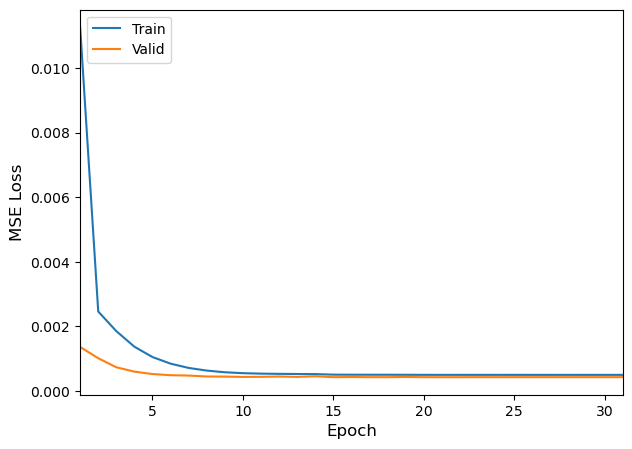

In [7]:
torch.save(state_dict, r'DenoisingAutoEncoder.pth')
plot_training_history(history);

In [8]:
import pickle

model = DenoisingAutoEncoder(latent_dim=9, input_dim=205, output_dim=205)
model.load_state_dict(torch.load('DenoisingAutoEncoder.pth'))
model.eval()

latent_spaces, recon, atten = get_results(model=model, data_loader=data_loader)
np.save(r'Data_preprocessed\hinoki_latent_denoise.npy', latent_spaces)

with open(r"Data_preprocessed\DenoisingAutoEncoder.pkl", "wb") as f:
    pickle.dump(atten, f)

In [9]:
def plot(num):
    plt.figure(figsize=(12, 5))
    plt.plot(wavenumber, data[num], label='Origin')
    plt.plot(wavenumber, recon[num], label='Recon')
    plt.xlabel('Wavenumber (cm$^{-1}$)')
    plt.gca().invert_xaxis()
    plt.legend(loc='upper right')
    plt.grid(True)
    plt.show()

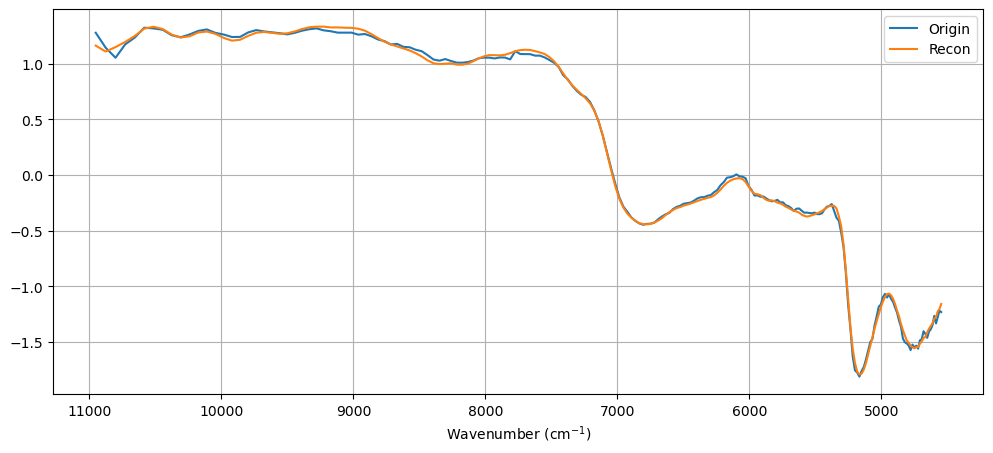

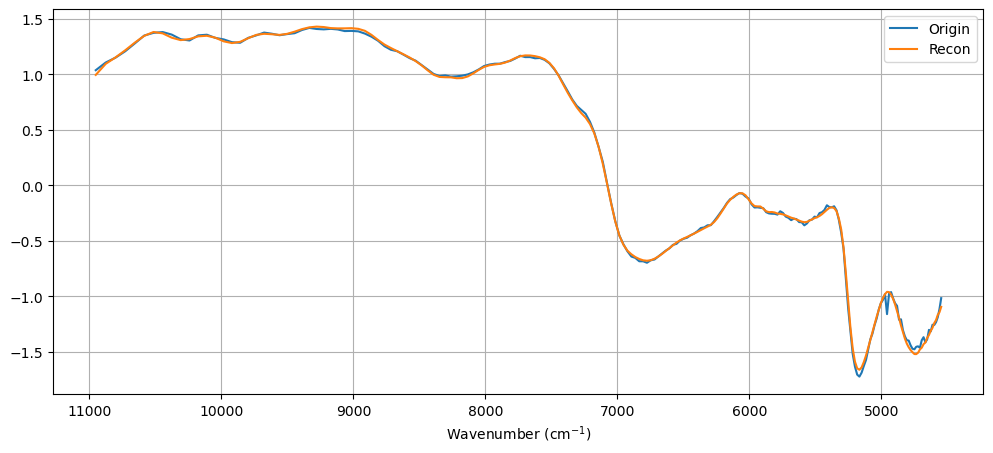

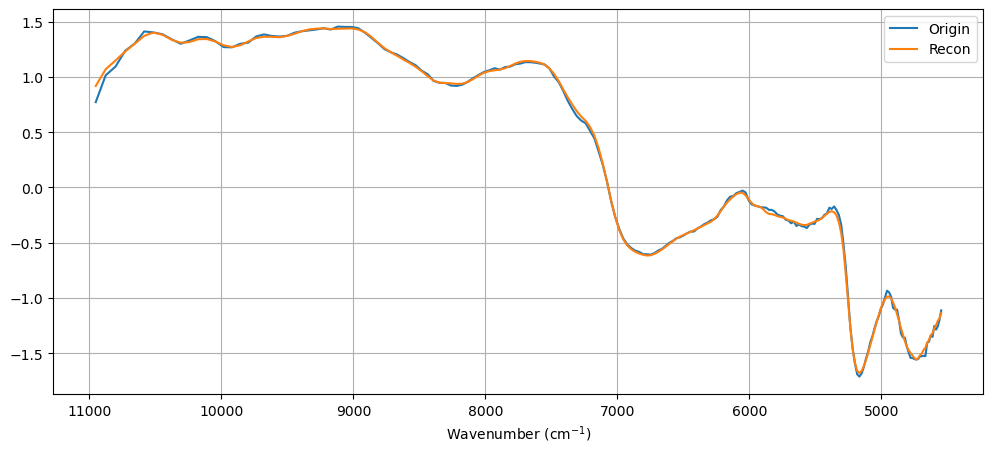

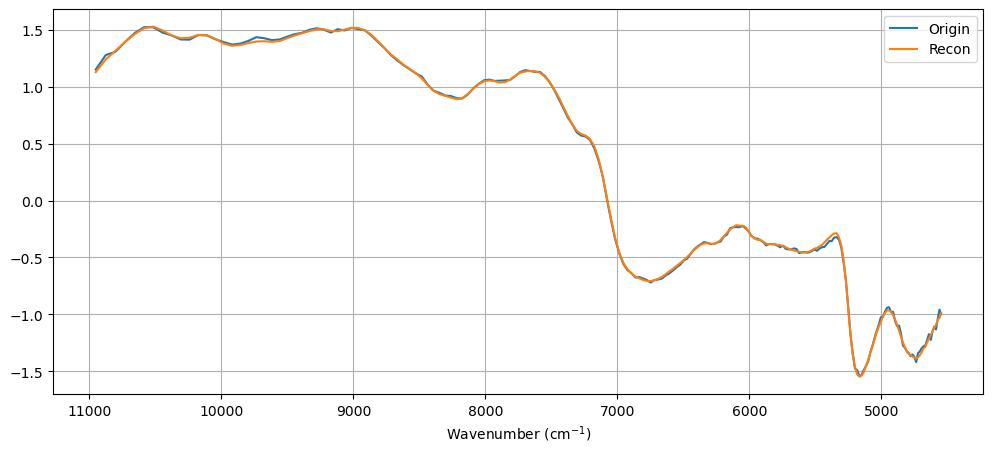

In [10]:
plot(100)
plot(1000)
plot(10000)
plot(100000);